In [1]:
%pylab inline
import vessel_scoring.models
import vessel_scoring.add_measures
from numpy.lib.recfunctions import *

model = vessel_scoring.models.train_models()[0][1]


Populating the interactive namespace from numpy and matplotlib
Warning, insufficient items to sample, returning all
Warning, inufficient items to sample, returning 4430
Warning, inufficient items to sample, returning 2084


addmeasures: 0
addmeasures: 0
addmeasures: 0
addmeasures: 0
addmeasures: 0
addmeasures: 0


(array([ 477.,   85.,   25.,    6.,    4.,    0.,    0.,    0.,    0.,    8.]),
 array([  7.63294547e-04,   1.00686965e-01,   2.00610636e-01,
          3.00534306e-01,   4.00457977e-01,   5.00381647e-01,
          6.00305318e-01,   7.00228988e-01,   8.00152659e-01,
          9.00076329e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

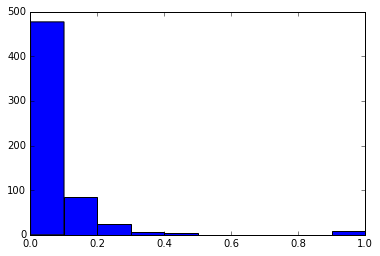

In [5]:
x = numpy.load("datasets/transit-412354445.npz")['x']
x = x[isnan(x['speed']) == False]
x = x[isnan(x['course']) == False]
#x['mmsi'] = numpy.ceil(x['mmsi'])
# x = x[lexsort((x['timestamp'], x['mmsi']))]
x = vessel_scoring.add_measures.add_measures(x)
for name in x.dtype.names:
    if 'stddev' in name and "_log" not in name:
        x = append_fields(x, name + "_log", [], dtypes='<f8', fill_value=0.0)
        x[name + "_log"] = log10(x[name] + 0.000001)
score = model.predict_proba(x)[:,1]
plt.hist(score)